In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

import numpy as np
from torch.utils.data import DataLoader

In [2]:
%autoreload 2
from evaluation.epiforecaster_eval import evaluate_checkpoint_topk_forecasts
from plotting.input_plots import collect_case_window_samples, make_cases_window_figure
from data.epi_dataset import EpiDataset
from data.preprocess.config import REGION_COORD
from models.configs import EpiForecasterConfig

/Volumes/HUBSSD/code/EpiForecaster/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/Volumes/HUBSSD/code/EpiForecaster/.venv/lib/python3.11/site-packages/zarr/codecs/numcodecs/_codecs.py:141: ZarrUserWarning: Numcodecs codecs are not in the Zarr version 3 specification and may not be supported by other zarr implementations.
  super().__init__(**codec_config)
/Volumes/HUBSSD/code/EpiForecaster/.venv/lib/python3.11/site-packages/zarr/codecs/numcodecs/_codecs.py:141: ZarrUserWarning: Numcodecs codecs are not in the Zarr version 3 specification and may not be supported by other zarr implementations.
  super().__init__(**codec_config)
/Volumes/HUBSSD/code/EpiForecaster/.venv/lib/python3.11/site-packages/zarr/codecs/numcodecs/_codecs.py:141: ZarrUserWarning: Numcodecs codecs are not in the Zarr version 3 specification and may not be supported by other zarr implementations.
  super().__init__(**codec_config)
/Volumes/HUBSSD/code/EpiForecaster/.venv/lib/python3.11/site-packages/zarr/codecs/numcodecs/_codecs.py:141: ZarrUserWarning: Numcodecs codecs are not in the Zarr version

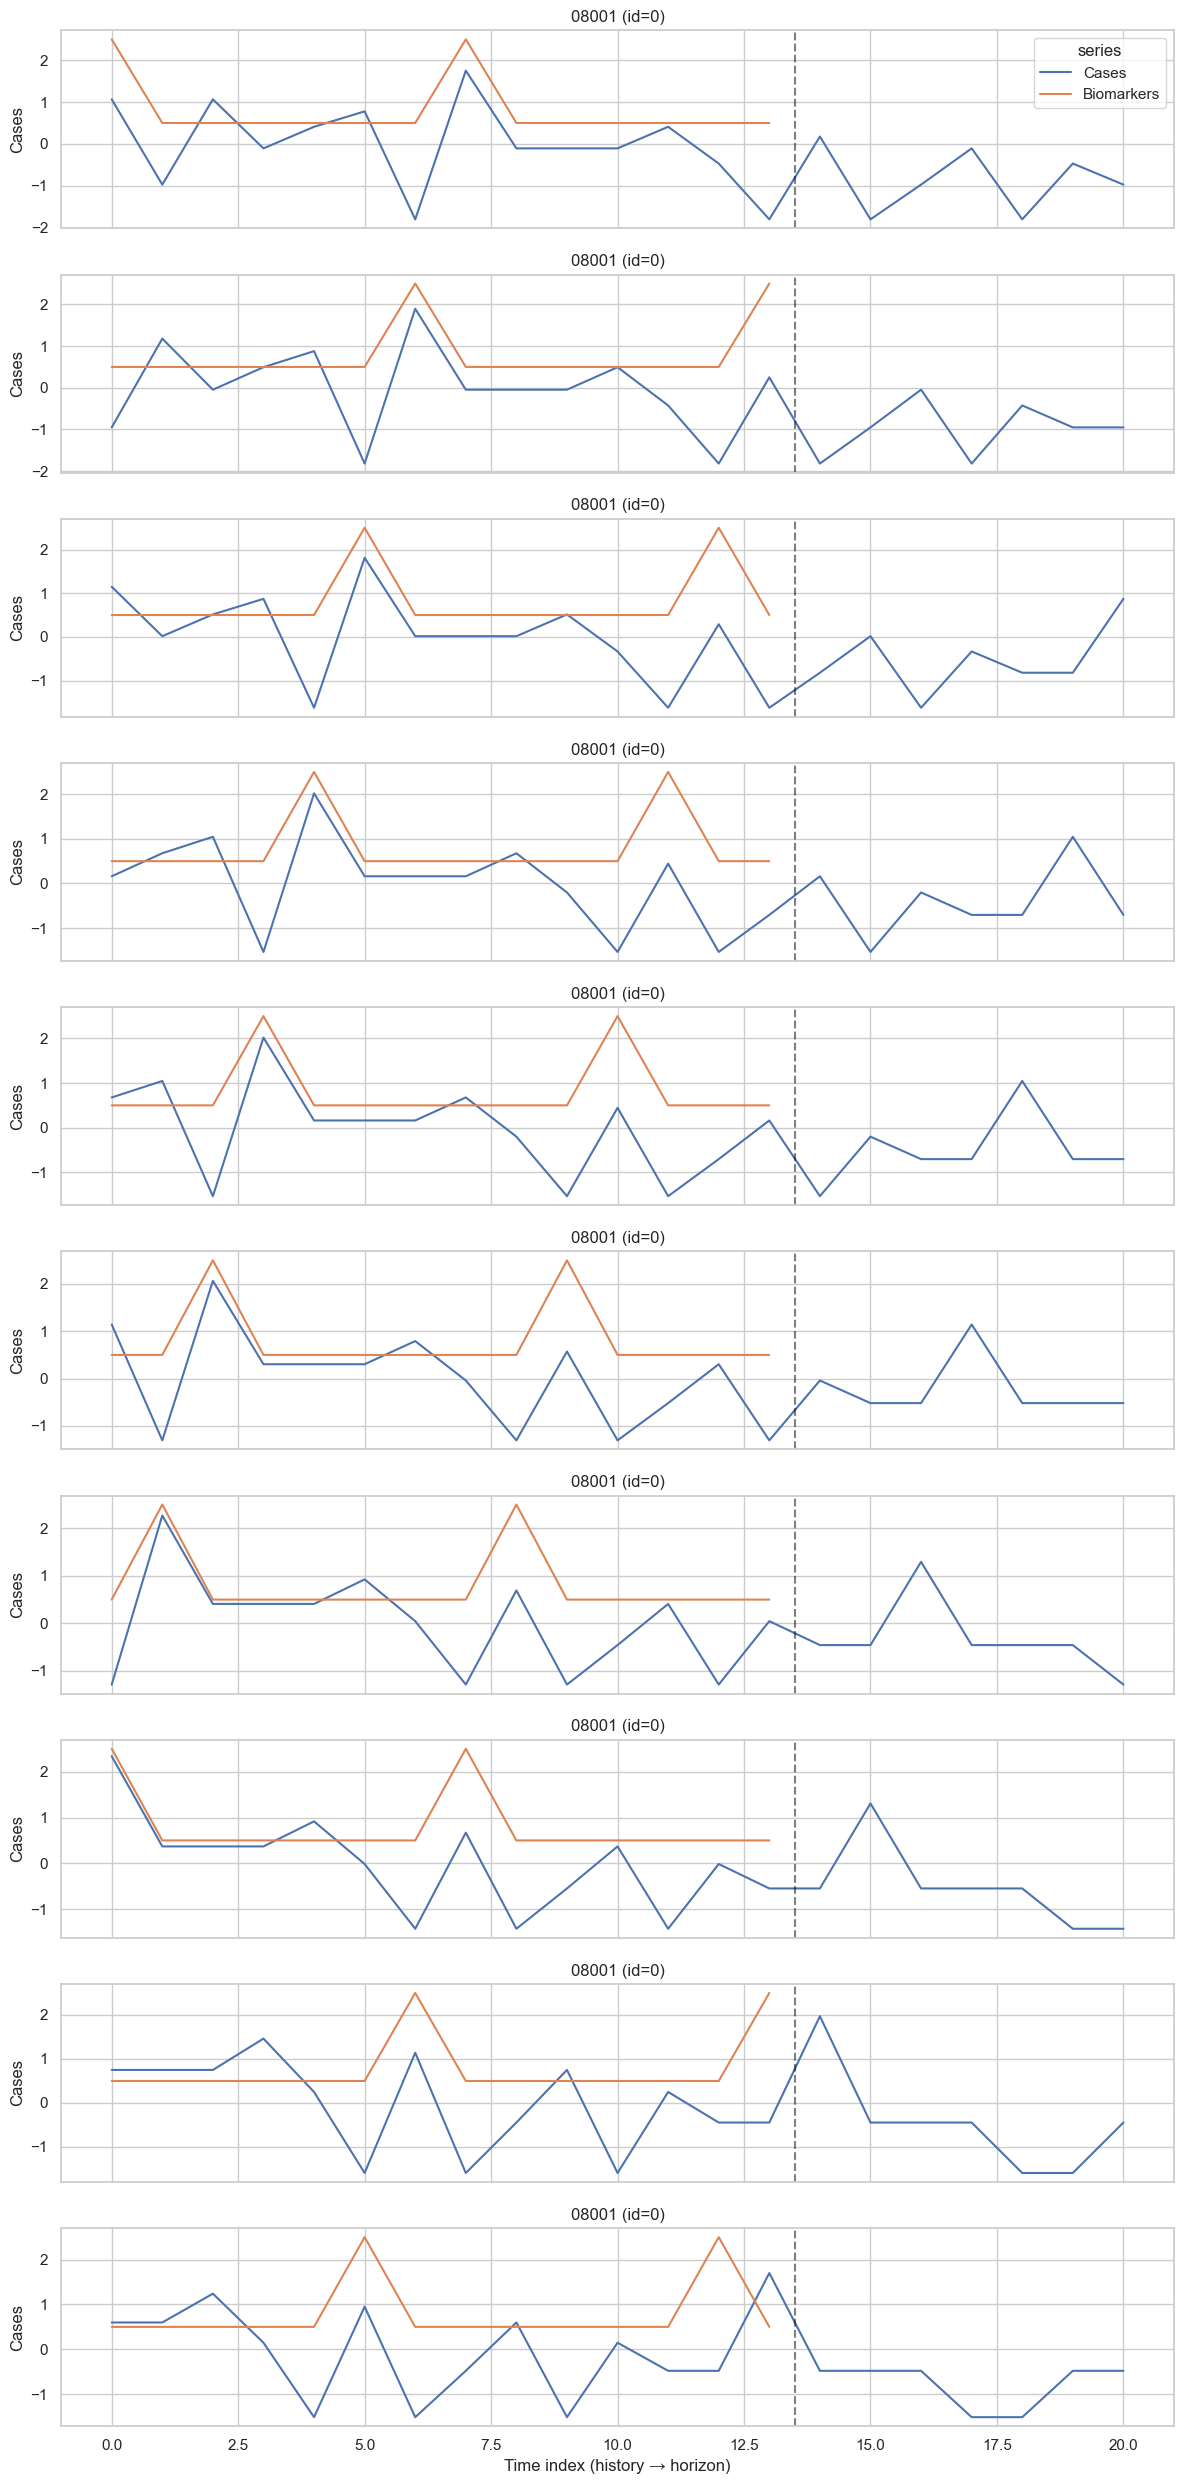

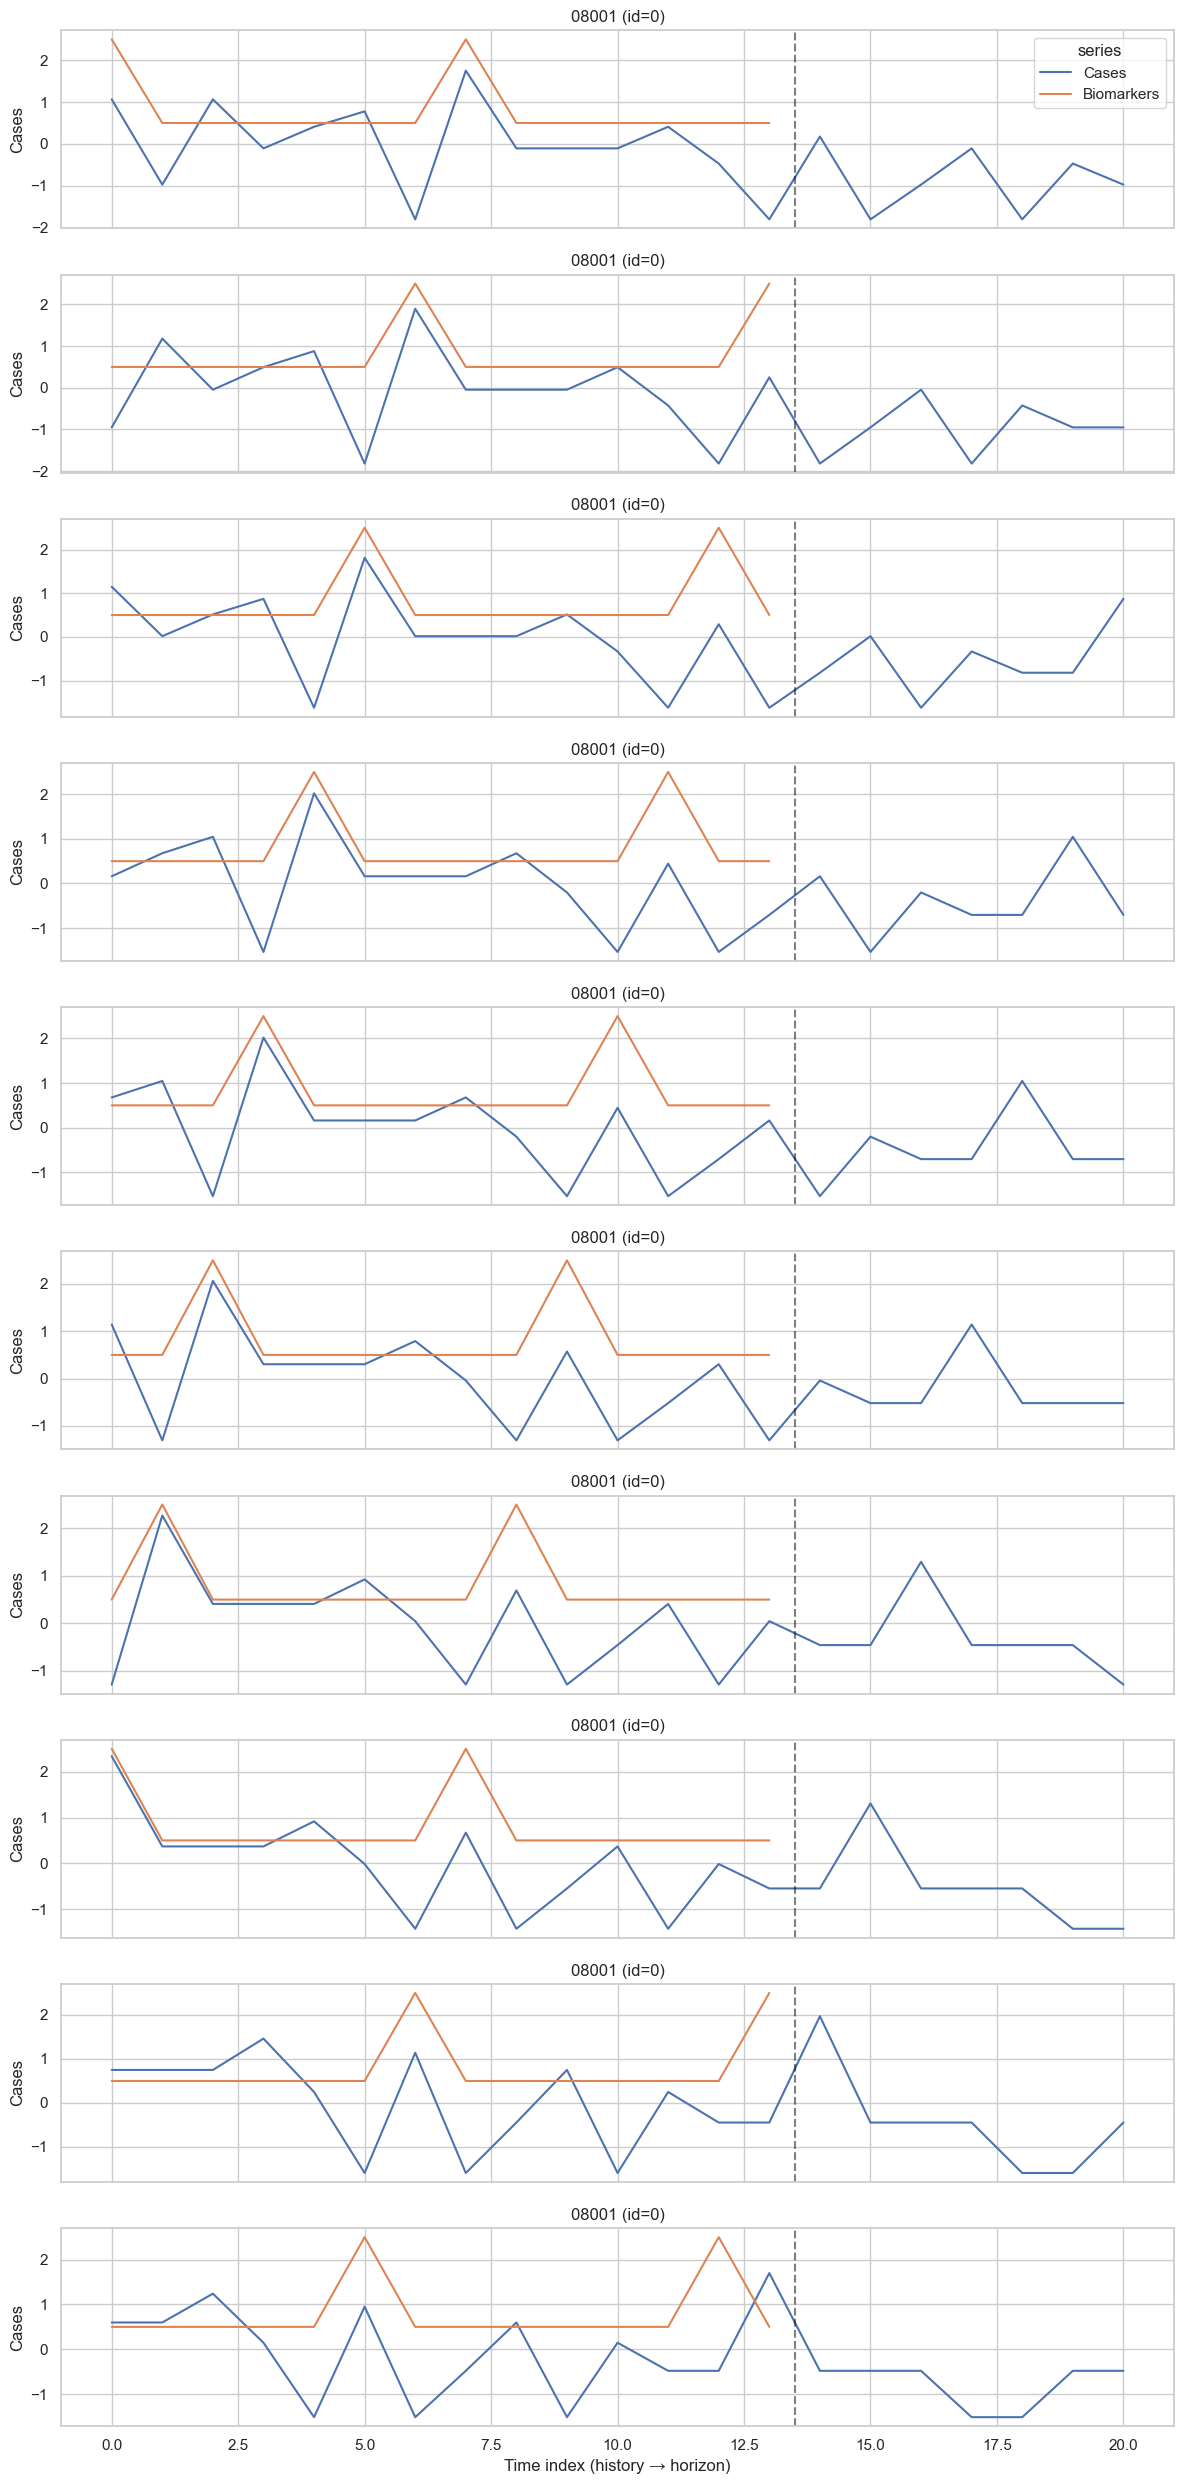

In [3]:
%autoreload 2

cfg = "configs/train_epifor_full.yaml"
cfg = EpiForecasterConfig.from_file(cfg)
data_raw = EpiDataset.load_canonical_dataset(Path(cfg.data.dataset_path))
nodes = np.arange(data_raw[REGION_COORD].size)

dataset = EpiDataset(config=cfg, target_nodes=nodes, context_nodes=nodes)
loader = DataLoader(dataset, batch_size=1, shuffle=False)

samples = collect_case_window_samples(
    loader,
    n=10,
    seed=123,
    include_biomarkers=True,
    include_mobility=False,
    biomarker_feature_idx=None,
)
fig = make_cases_window_figure(samples, history_length=cfg.model.history_length)

fig

[autoreload of models.configs failed: Traceback (most recent call last):
  File "/Volumes/HUBSSD/code/EpiForecaster/.venv/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 325, in check
    superreload(m, reload, self.old_objects)
  File "/Volumes/HUBSSD/code/EpiForecaster/.venv/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 621, in superreload
    update_generic(old_obj, new_obj)
  File "/Volumes/HUBSSD/code/EpiForecaster/.venv/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 447, in update_generic
    update(a, b)
  File "/Volumes/HUBSSD/code/EpiForecaster/.venv/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 399, in update_class
    if update_generic(old_obj, new_obj):
       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Volumes/HUBSSD/code/EpiForecaster/.venv/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 447, in update_generic
    update(a, b)
  File "/Volumes/HUBSSD/code/EpiForecas

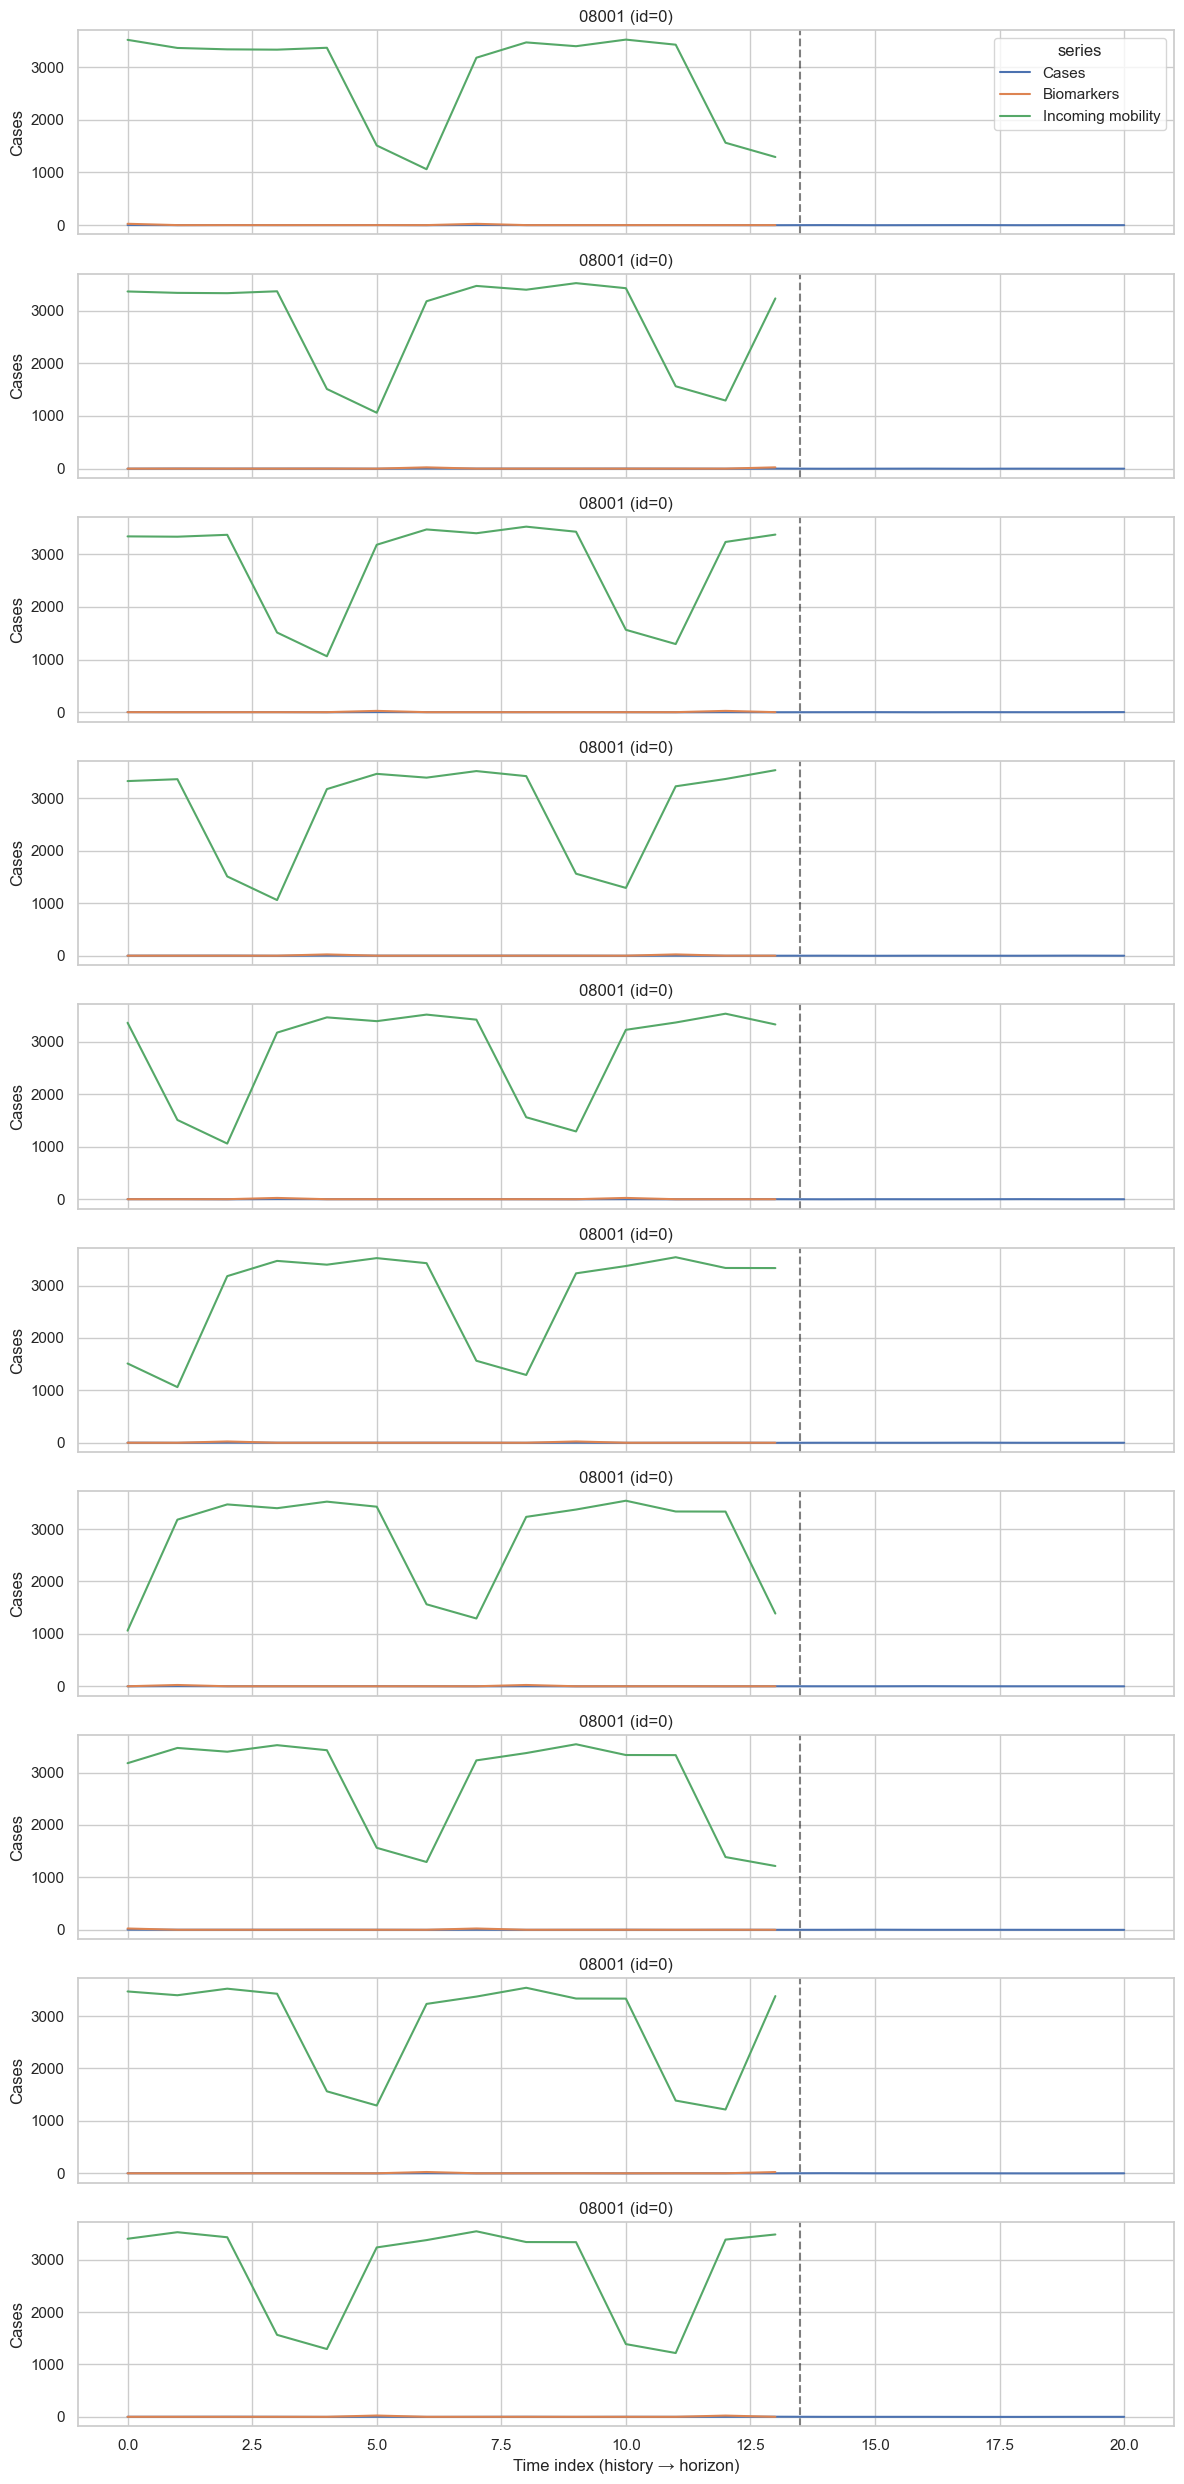

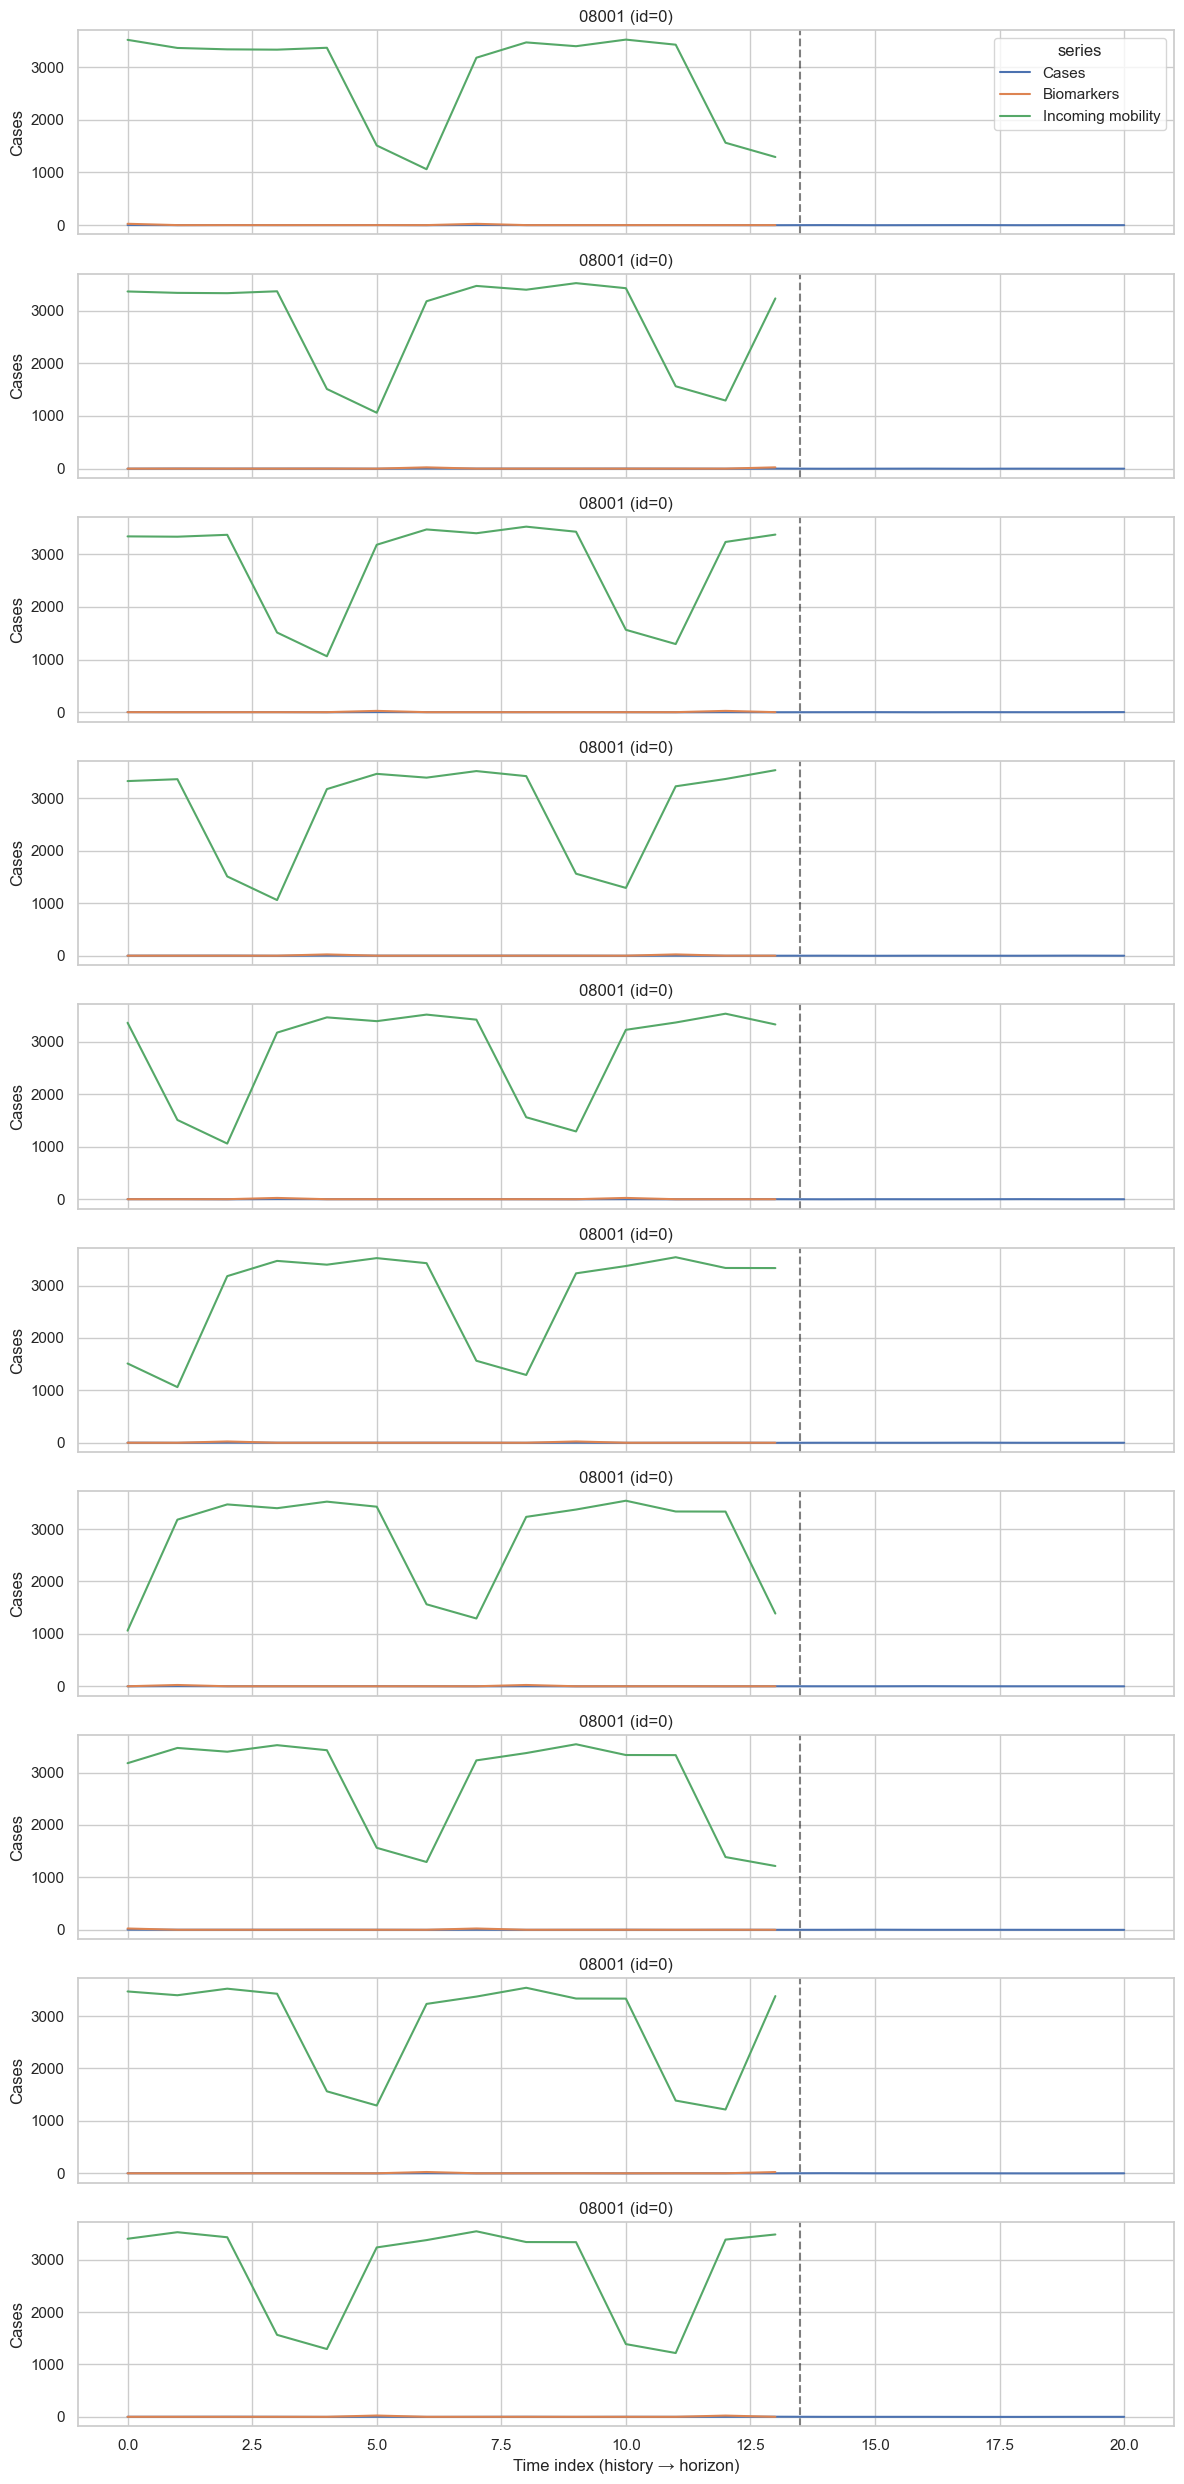

In [ ]:
%autoreload 2
from pathlib import Path

import numpy as np
from torch.utils.data import DataLoader

from data.epi_dataset import EpiDataset
from data.preprocess.config import REGION_COORD
from models.configs import EpiForecasterConfig
from plotting.input_plots import make_cases_window_figure

cfg = "configs/train_epifor_full.yaml"
cfg = EpiForecasterConfig.from_file(cfg)
data_raw = EpiDataset.load_canonical_dataset(Path(cfg.data.dataset_path))
nodes = np.arange(data_raw[REGION_COORD].size)

dataset = EpiDataset(config=cfg, target_nodes=nodes, context_nodes=nodes)
loader = DataLoader(dataset, batch_size=1, shuffle=False)

samples = collect_case_window_samples(
    loader,
    n=10,
    seed=123,
    include_biomarkers=True,
    include_mobility=True,
    biomarker_feature_idx=None,
)
fig = make_cases_window_figure(samples, history_length=cfg.model.history_length)

fig

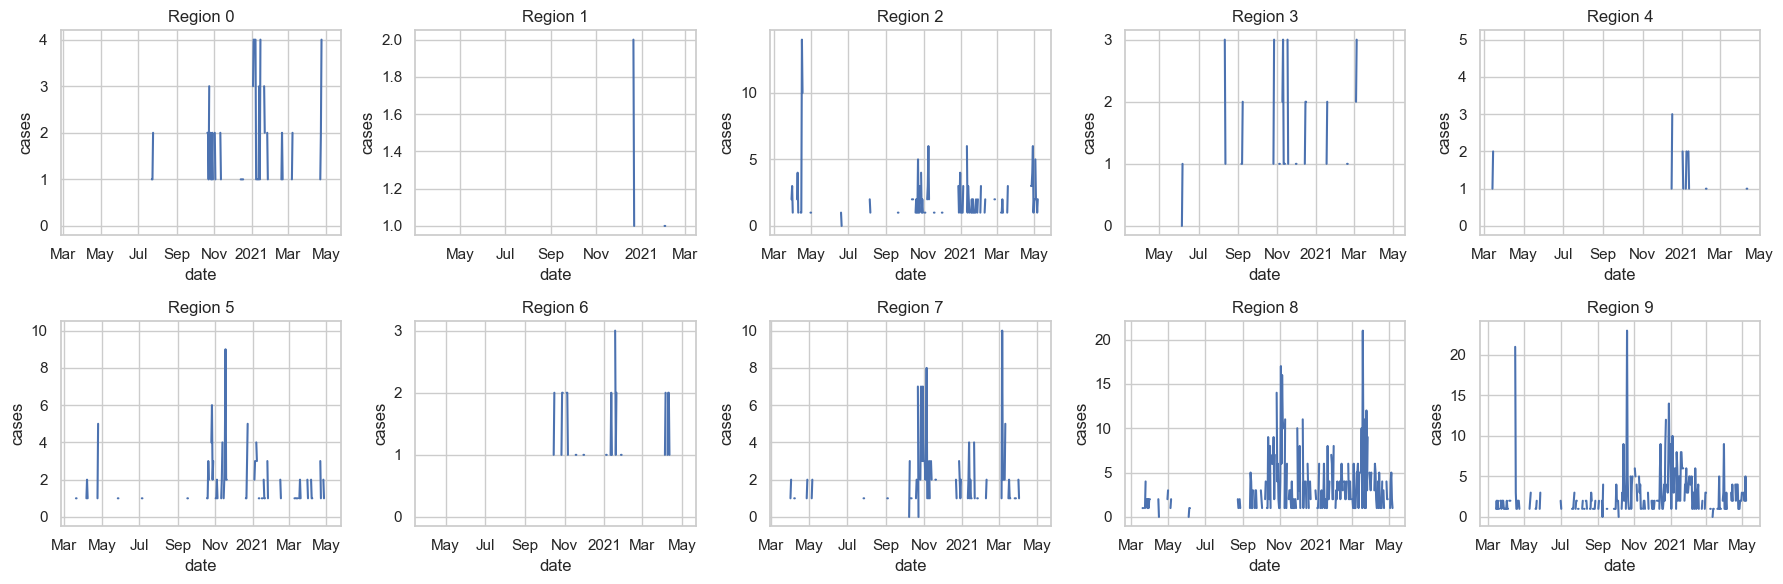

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(18, 6))
axes = axes.flatten()

for i in range(10):
    ax = axes[i]
    dataset.dataset.isel({REGION_COORD: i + 50}).cases.plot(ax=ax)
    ax.set_title(f"Region {i}")

plt.tight_layout()
plt.show()

In [30]:
from data.preprocess.config import PreprocessingConfig
from data.preprocess.processors import (
    cases_processor,
    edar_processor,
    mobility_processor,
)

pcfg = PreprocessingConfig.from_file("configs/preprocess_full.yaml")

gdf = gpd.read_file("data/files/geo/fl_municipios_catalonia.geojson")
pop = pd.read_csv("data/files/fl_population_por_municipis.csv")
canon = xr.open_zarr("data/processed/full_v1.zarr")

dstart, dend = canon.date.min(), canon.date.max()

cases = cases_processor.CasesProcessor(pcfg)._load_cases_data(pcfg.cases_file)
edar = edar_processor.EDARProcessor(pcfg)._load_wastewater_data(pcfg.wastewater_file)
mob = mobility_processor.MobilityProcessor(pcfg)._open_dataset(pcfg.mobility_path)

dstart, dend

/Volumes/HUBSSD/code/EpiForecaster/.venv/lib/python3.11/site-packages/zarr/codecs/numcodecs/_codecs.py:141: ZarrUserWarning: Numcodecs codecs are not in the Zarr version 3 specification and may not be supported by other zarr implementations.
  super().__init__(**codec_config)
/Volumes/HUBSSD/code/EpiForecaster/.venv/lib/python3.11/site-packages/zarr/codecs/numcodecs/_codecs.py:141: ZarrUserWarning: Numcodecs codecs are not in the Zarr version 3 specification and may not be supported by other zarr implementations.
  super().__init__(**codec_config)


Opening OD dataset...
<xarray.Dataset> Size: 3GB
Dimensions:      (date: 451, origin: 963, destination: 963)
Coordinates:
  * date         (date) datetime64[ns] 4kB 2020-02-14 2020-02-15 ... 2021-05-09
  * origin       (origin) <U5 19kB '17202' '17203' '17204' ... '25101' '25170'
  * destination  (destination) <U5 19kB '17202' '17203' ... '25101' '25170'
Data variables:
    mobility     (date, origin, destination) float64 3GB dask.array<chunksize=(14, 241, 241), meta=np.ndarray>
<xarray.Dataset> Size: 3GB
Dimensions:      (date: 451, origin: 963, destination: 963)
Coordinates:
  * date         (date) datetime64[ns] 4kB 2020-02-14 2020-02-15 ... 2021-05-09
  * origin       (origin) <U5 19kB '17202' '17203' '17204' ... '25101' '25170'
  * destination  (destination) <U5 19kB '17202' '17203' ... '25101' '25170'
Data variables:
    mobility     (date, origin, destination) float64 3GB dask.array<chunksize=(14, 241, 241), meta=np.ndarray>


(<xarray.DataArray 'date' ()> Size: 8B
 array('2020-03-01T00:00:00.000000000', dtype='datetime64[ns]'),
 <xarray.DataArray 'date' ()> Size: 8B
 array('2021-05-09T00:00:00.000000000', dtype='datetime64[ns]'))

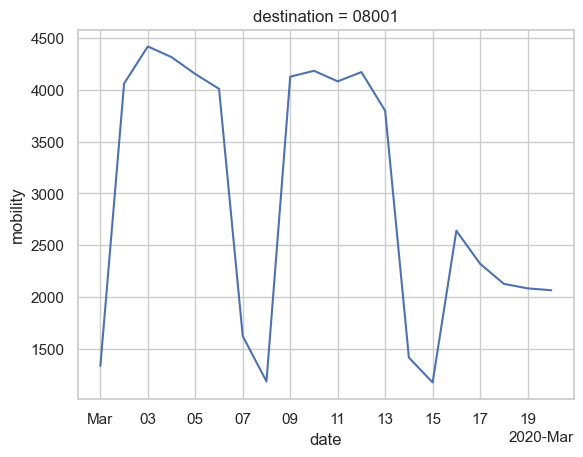

In [128]:
# weekend periodicity
canon.sel(destination="08001").isel(date=slice(0, 20)).sum("origin").mobility.plot()

/Volumes/HUBSSD/code/EpiForecaster/.venv/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)
/Volumes/HUBSSD/code/EpiForecaster/.venv/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)
/Volumes/HUBSSD/code/EpiForecaster/.venv/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)
/Volumes/HUBSSD/code/EpiForecaster/.venv/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


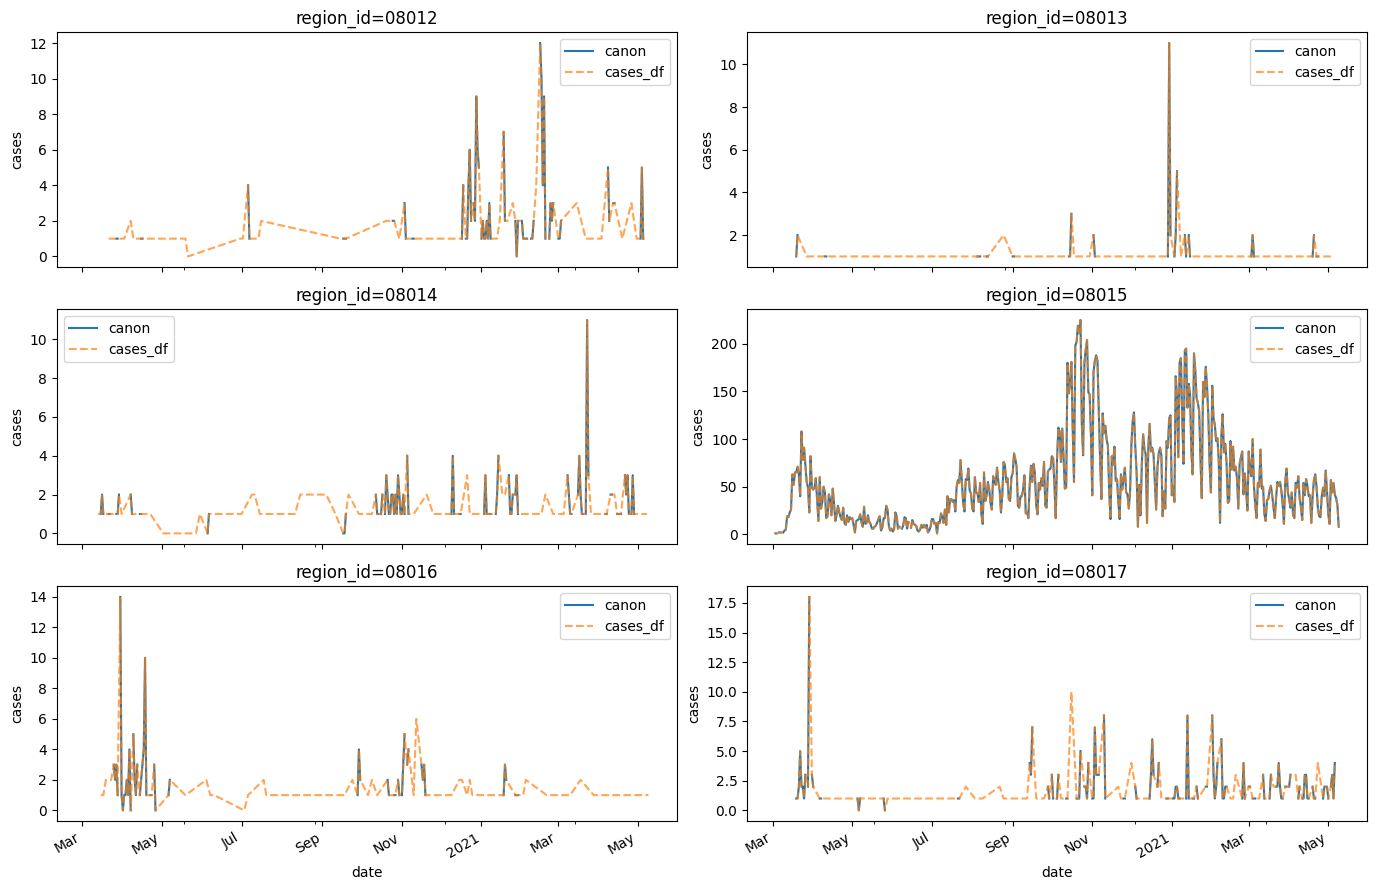

In [4]:
offset = 10
dstart, dend = canon.date.min().values, canon.date.max().values

fig, axes = plt.subplots(3, 2, figsize=(14, 9), sharex=True)
for j, ax in enumerate(axes.flat):
    region_idx = j + offset
    region_id = canon.region_id.values[region_idx]

    # Column 1: canon dataset
    canon.isel(region_id=region_idx).cases.plot(ax=ax, label="canon")

    # Column 2: matching region in cases_df, if found
    matching_cases = cases[cases["region_id"] == region_id]
    matching_cases = matching_cases.groupby("date")["cases"].sum().sort_index()
    matching_cases = matching_cases[matching_cases.index >= dstart]
    matching_cases = matching_cases[matching_cases.index <= dend]
    if not matching_cases.empty:
        matching_cases.plot(ax=ax, style="--", label="cases_df", alpha=0.7)

    ax.set_title(f"region_id={region_id}")
    ax.legend()

plt.tight_layout()
plt.show()

In [23]:
pop.id.isin(gdf.id).sum()

np.int64(0)

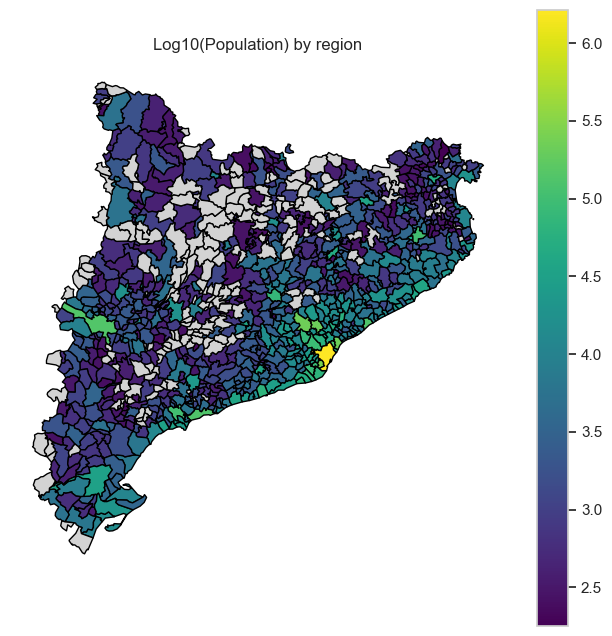

In [ ]:
canon_pop = canon.population.to_pandas().reset_index()
gdf_pop = gdf.merge(canon_pop, left_on="id", right_on="region_id", how="left")

# Plot the log10 of population
fig, ax = plt.subplots(figsize=(8, 8))
gdf_pop.plot(
    column=np.log10(gdf_pop["population"]),
    cmap="viridis",
    legend=True,
    ax=ax,
    edgecolor="black",
    missing_kwds={"color": "lightgrey"},
)
ax.set_title("Log10(Population) by region")
ax.axis("off")
plt.show()

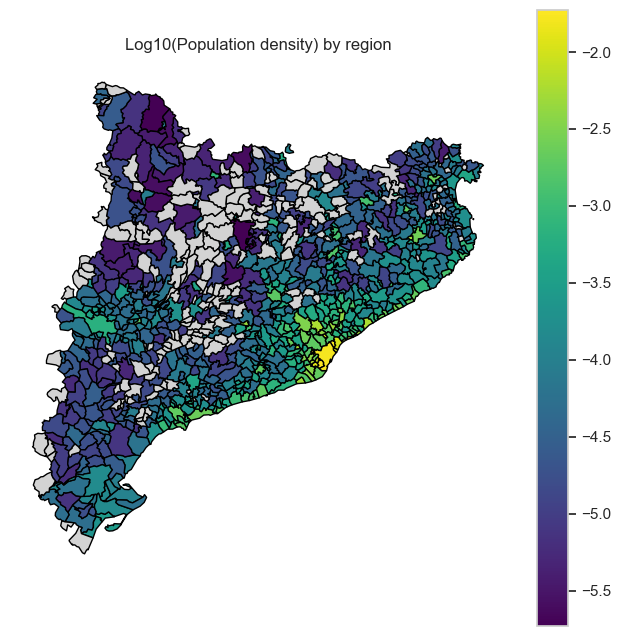

In [32]:
canon_pop = canon.population.to_pandas().reset_index()
gdf_pop = gdf.merge(canon_pop, left_on="id", right_on="region_id", how="left")

# Plot the log10 of population
fig, ax = plt.subplots(figsize=(8, 8))
gdf_pop.plot(
    column=np.log10(gdf_pop["population"] / gdf_pop.geometry.area),
    cmap="viridis",
    legend=True,
    ax=ax,
    edgecolor="black",
    missing_kwds={"color": "lightgrey"},
)
ax.set_title("Log10(Population density) by region")
ax.axis("off")
plt.show()

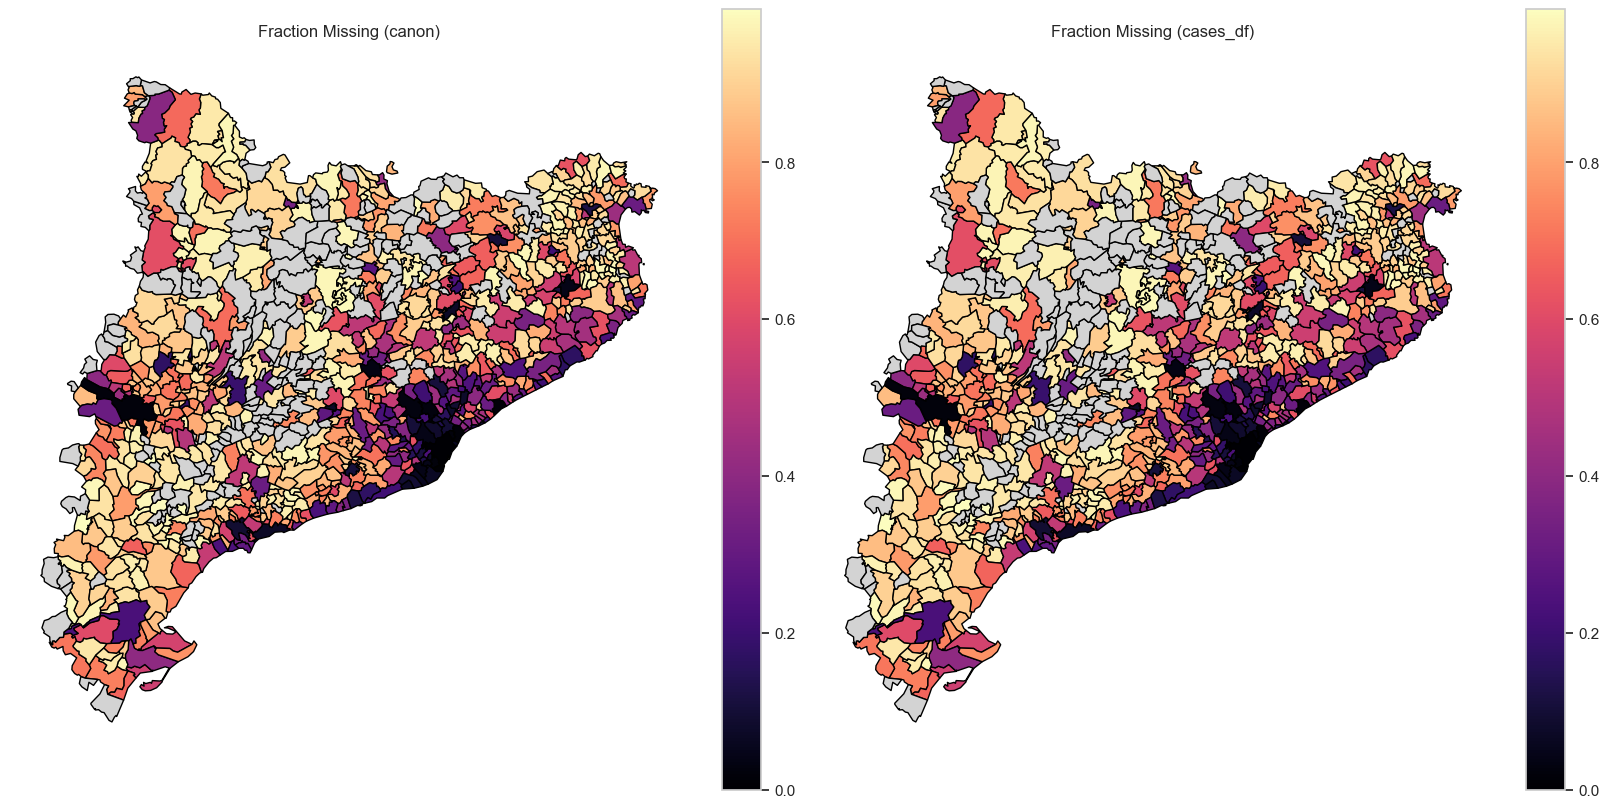

In [26]:
# Calculate fraction of missing values per region in canon (xarray)
null_frac_canon = canon.cases.isnull().sum("date") / canon.cases.sizes["date"]
null_frac_canon_df = null_frac_canon.to_pandas().reset_index()
null_frac_canon_df = null_frac_canon_df.rename(columns={"cases": "missing_frac_canon"})


# Calculate fraction of missing values per region in cases DataFrame
total_dates = pd.date_range(dstart, dend, freq="D")
ndates = len(total_dates)
cases_full = cases.set_index(["date", "region_id"])
missing_counts = (
    cases_full["cases"].unstack("region_id").reindex(total_dates).isnull().sum(axis=0)
)
null_frac_cases_df = (missing_counts / ndates).reset_index()
null_frac_cases_df = null_frac_cases_df.rename(
    columns={0: "missing_frac_cases", "region_id": "region_id"}
)

# Merge both null fraction columns
null_frac_df = pd.merge(
    null_frac_canon_df, null_frac_cases_df, on="region_id", how="outer"
)

region_gdf = gdf.merge(null_frac_df, left_on="id", right_on="region_id", how="left")

# Plot both side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8), constrained_layout=True)
for ax, col, title in zip(
    axes,
    ["missing_frac_canon", "missing_frac_cases"],
    ["Fraction Missing (canon)", "Fraction Missing (cases_df)"],
    strict=False,
):
    reg_plot = region_gdf.plot(
        column=col,
        cmap="magma",
        legend=True,
        ax=ax,
        edgecolor="black",
        missing_kwds={"color": "lightgrey"},
    )
    ax.set_title(title)
    ax.axis("off")
plt.show()

Text(0.5, 1.0, 'Fraction Missing (cases_df) threshold 0.2')

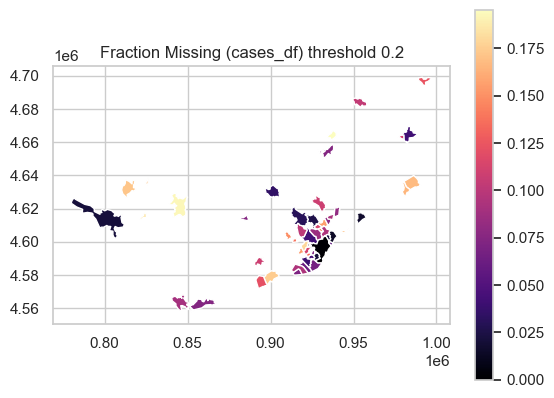

In [66]:
# massive missing data
ax = region_gdf[region_gdf.missing_frac_cases < 0.2].plot(
    column="missing_frac_cases",
    cmap="magma",
    legend=True,
)
ax.set_title("Fraction Missing (cases_df) threshold 0.2")

Text(0.5, 1.0, 'Fraction missing cases by population')

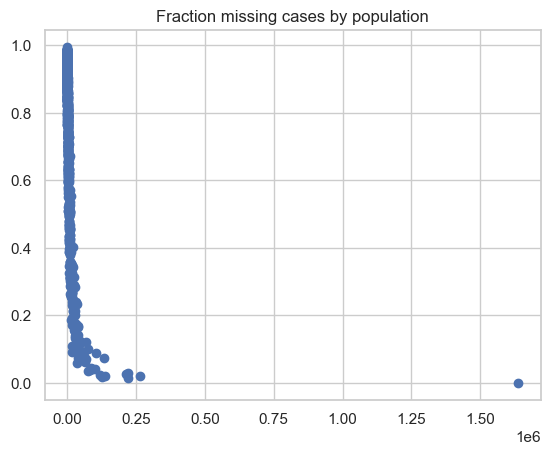

In [60]:
gdfall = gdf_pop.merge(region_gdf, on="id")
plt.plot(gdfall.population, gdfall.missing_frac_cases, "o")
plt.title("Fraction missing cases by population")

In [78]:
(dend - dstart) / np.timedelta64(1, "D")

np.float64(434.0)

In [40]:
dstart, dend.values

(<xarray.DataArray 'date' ()> Size: 8B
 array('2020-03-01T00:00:00.000000000', dtype='datetime64[ns]'),
 np.datetime64('2021-05-09T00:00:00.000000000'))

In [36]:
cases.date.min(), cases.date.max()

(Timestamp('2020-03-01 00:00:00'), Timestamp('2022-07-25 00:00:00'))

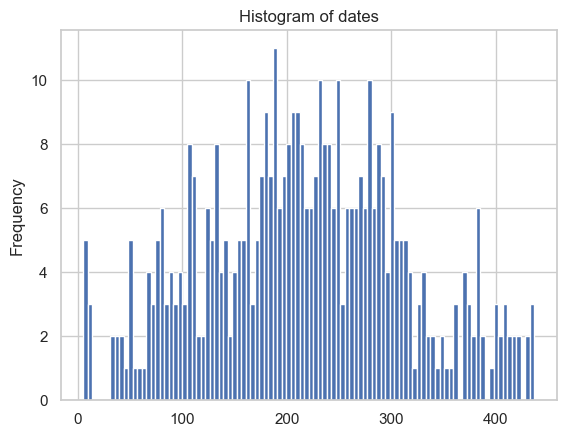

In [41]:
# histogram of dates. should be uniform
cases_cropped = cases[(cases.date >= dstart.values) & (cases.date <= dend.values)]
cases_cropped["date"].value_counts().plot(kind="hist", bins=100)
plt.title("Histogram of dates")
plt.show()

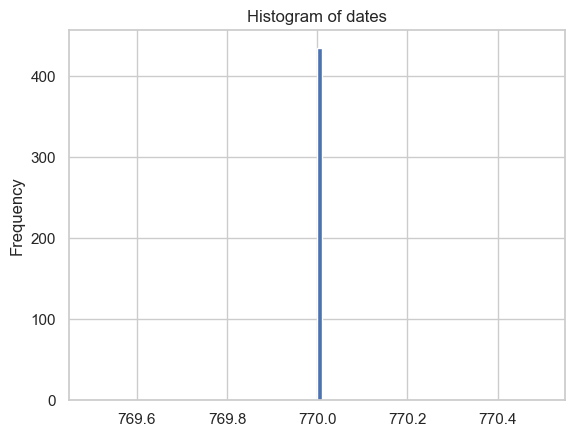

In [42]:
# pivot and sum cases duped by date, keepna on missing dates
cases_consistent = cases_cropped.pivot_table(
    index="date", columns="region_id", values="cases", aggfunc="sum", fill_value=np.nan
)
# melt
cases_consistent = cases_consistent.reset_index().melt(
    id_vars=["date"], var_name="region_id", value_name="cases"
)

cases_consistent.date.value_counts().plot(kind="hist", bins=100)
plt.title("Histogram of dates")
plt.show()

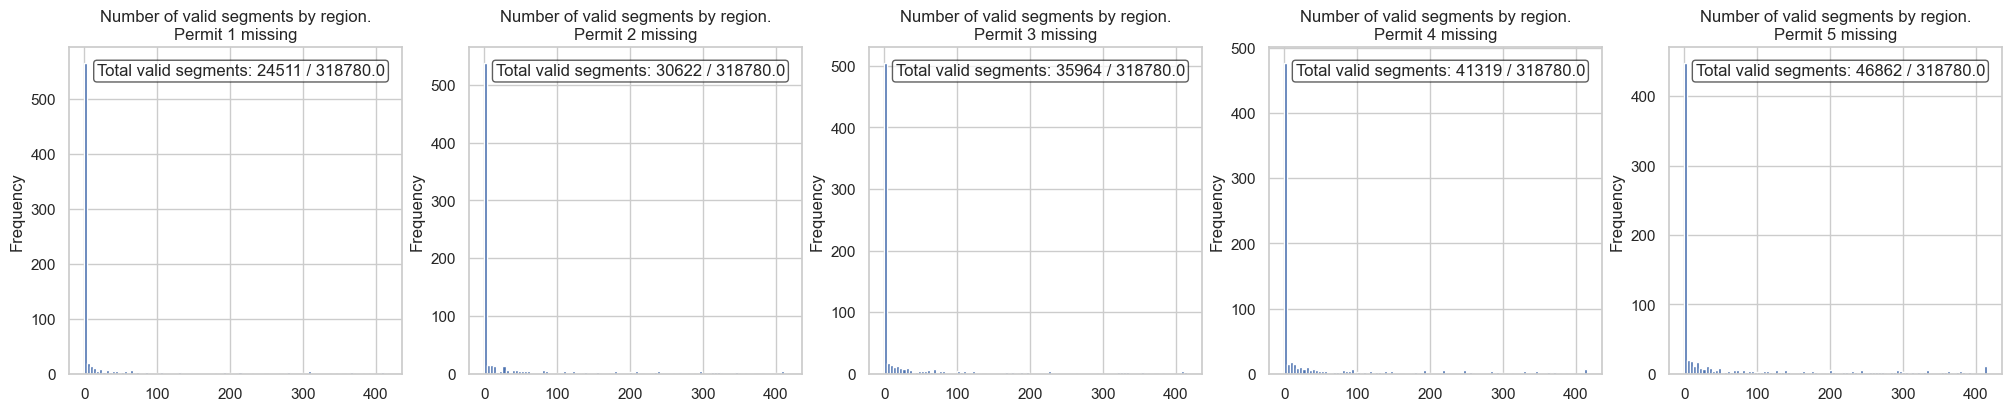

In [43]:
# heuristic missing data. we can use segments instead of the full series. so how many valid segments do regions have?
T = 14  # time window
H = 7  # horizon
seg = T + H
# permit = 3

fig, axes = plt.subplots(1, 5, figsize=(4 * 5, 4), constrained_layout=True)
for i, permit in enumerate([1, 2, 3, 4, 5]):
    # count number of valid segments for each region
    valid_segments = cases_consistent.groupby("region_id")["cases"].apply(
        lambda x: (x.notnull().rolling(window=seg).sum() >= seg - permit).sum()
    )
    creg = cases_consistent.region_id
    period = (
        cases_consistent.date.max() - cases_consistent.date.min()
    ) / np.timedelta64(1, "D")
    # The theoretical maximum number of valid rolling segments: must be computed as
    # (number of possible rolling windows per region) * num_regions
    theoretical_max = (period - seg + 1) * creg.nunique()

    ax = valid_segments.plot(kind="hist", bins=100, ax=axes[i])
    ax.set_title(f"Number of valid segments by region.\nPermit {permit} missing")
    total_valid_segments = valid_segments.sum()
    ax.text(
        0.95,
        0.95,
        f"Total valid segments: {total_valid_segments} / {theoretical_max}",
        transform=ax.transAxes,
        fontsize=12,
        ha="right",
        va="top",
        bbox={"boxstyle": "round,pad=0.2", "fc": "w", "ec": "k", "alpha": 0.7},
        axes=axes[i],
    )

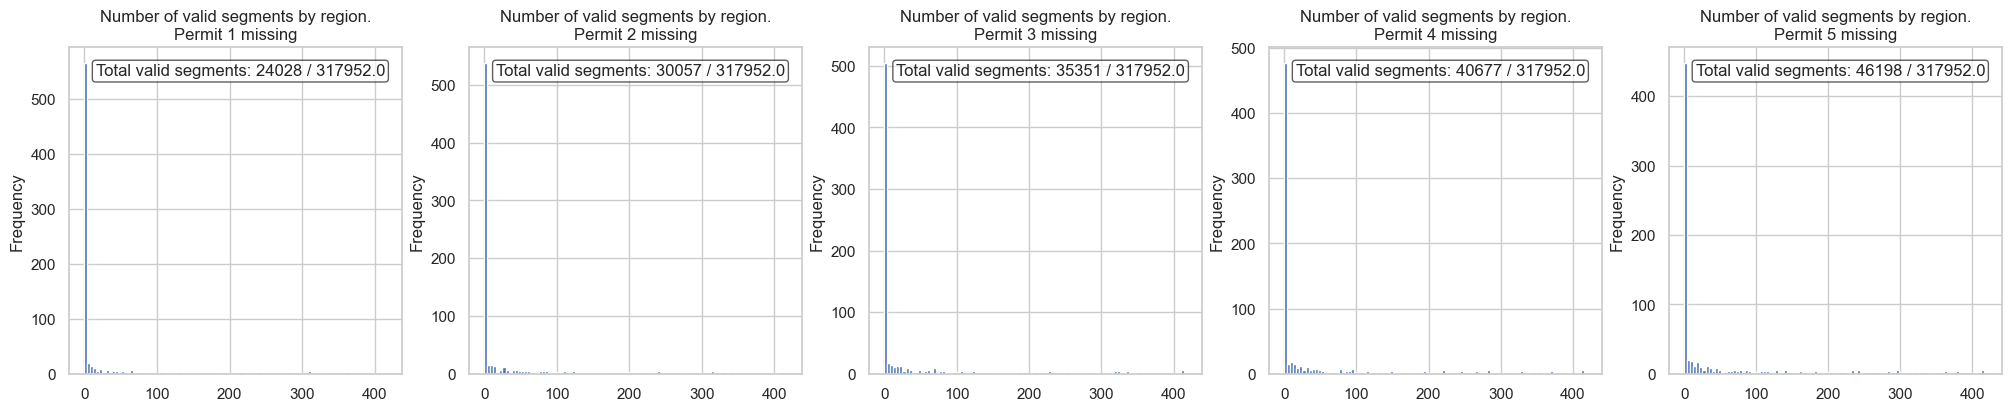

In [44]:
# heuristic missing data. we can use segments instead of the full series. so how many valid segments do regions have?
T = 14  # time window
H = 7  # horizon
seg = T + H
# permit = 3

fig, axes = plt.subplots(1, 5, figsize=(4 * 5, 4), constrained_layout=True)
for i, permit in enumerate([1, 2, 3, 4, 5]):
    # count number of valid segments for each region
    valid_segments = (
        (
            canon.cases.rolling(date=seg).construct("window").notnull().sum("window")
            >= seg - permit
        )
        .sum("date")
        .to_pandas()
    )
    period = (canon.date.max() - canon.date.min()) / np.timedelta64(1, "D")
    # The theoretical maximum number of valid rolling segments: must be computed as
    # (number of possible rolling windows per region) * num_regions
    theoretical_max = (period - seg + 1) * canon.region_id.size
    theoretical_max = theoretical_max.item()

    # print(valid_segments)
    ax = valid_segments.plot(kind="hist", bins=100, ax=axes[i])
    ax.set_title(f"Number of valid segments by region.\nPermit {permit} missing")
    total_valid_segments = valid_segments.sum()
    ax.text(
        0.95,
        0.95,
        f"Total valid segments: {total_valid_segments} / {theoretical_max}",
        transform=ax.transAxes,
        fontsize=12,
        ha="right",
        va="top",
        bbox={"boxstyle": "round,pad=0.2", "fc": "w", "ec": "k", "alpha": 0.7},
        axes=axes[i],
    )

In [7]:
from data.epi_dataset import EpiDataset

# Use all region indices as targets (canonical regions)
target_nodes = list(range(canon.region_id.size))
context_nodes = target_nodes  # for simplicity; could subset

epi_dataset = EpiDataset(cfg, target_nodes, context_nodes)
print(f"Number of valid windows for model: {len(epi_dataset)}")
print(f"Permit {epi_dataset.missing_permit} nan")
print(f"Window stride: {epi_dataset.window_stride}")
print(
    f"Window starts: {epi_dataset.window_starts[:10]} ... total={len(epi_dataset.window_starts)}"
)

Number of valid windows for model: 24027
Permit 1 nan
Window stride: 1
Window starts: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] ... total=415


/Volumes/HUBSSD/code/EpiForecaster/.venv/lib/python3.11/site-packages/zarr/codecs/numcodecs/_codecs.py:141: ZarrUserWarning: Numcodecs codecs are not in the Zarr version 3 specification and may not be supported by other zarr implementations.
  super().__init__(**codec_config)


<Axes: xlabel='date'>

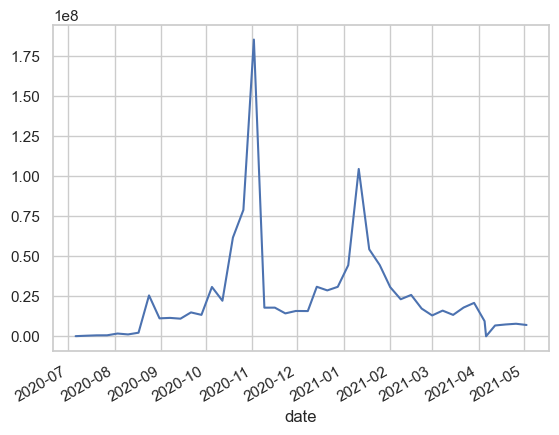

In [ ]:
edar.set_index("date")["viral_load"].groupby("date").sum().plot()

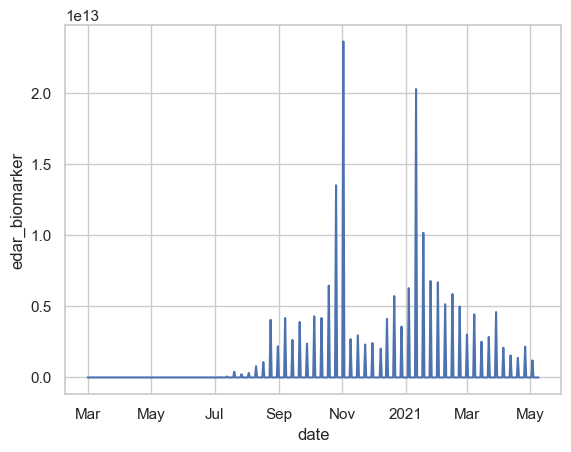

In [147]:
canon.edar_biomarker.sum("region_id").plot()

In [ ]:
# number of regions with edar data
(canon.edar_biomarker.sum("date") > 0).compute().sum(), canon.region_id.size

(<xarray.DataArray 'edar_biomarker' ()> Size: 8B
 array(200),
 768)